<a href="https://colab.research.google.com/github/matiasjara987/Libros-Colab/blob/main/Analisis_DataSet_GOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder


tabla1= pd.read_excel('drive/MyDrive/Colab Notebooks/parte_1.xlsx', engine='openpyxl');
tabla2 = pd.read_excel('drive/MyDrive/Colab Notebooks/parte_2.xlsx', engine='openpyxl');
resultado = pd.merge(tabla1, tabla2, on="primary_key", how='left');
resultado.rename(columns={'primary_key': 'ID', 'Season': 'Temporada', 'U.S. viewers(millions)' : 'espectadores', 'Imdb rating' : 'rating'}, inplace=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
columnas = ['espectadores', 'rating']

resultado = resultado.sort_values(by='ID')
fechaformato = '%Y-%m-%d'
resultado['Original air date'] = pd.to_datetime(resultado['Original air date'], format=fechaformato, errors='coerce')

def calcular_estadisticas(datos):
  me = stats.mode(datos.dropna(), nan_policy='omit')
  moda = me[0] if not me.mode.size == 0 else None
  return {
      'Media': round(datos.mean(), 1),
        'Mediana': datos.median(),
        'Moda': moda,
        'Varianza': round(datos.var(), 1),
        'Desviación Estándar': round(datos.std(), 1),
        'Rango': datos.max() - datos.min()
        }
def generar_tabla(resultado, columnas):
    return pd.DataFrame({col: calcular_estadisticas(resultado[col]) for col in columnas}).T

def rellenar_na_con_fecha_mas_cercana(df, columna_fecha):
    df[columna_fecha] = df[columna_fecha].fillna(method='ffill').fillna(method='bfill')
    return df


In [ ]:
tabla = generar_tabla(resultado, columnas)
print(tabla)

              Media  Mediana  Moda  Varianza  Desviación Estándar  Rango
espectadores    6.6     6.64   2.2       8.4                  2.9  11.41
rating          8.8     8.90   8.8       1.0                  1.0   5.90


In [ ]:
#Feemplazar los valores
resultado['espectadores'].fillna(round(resultado['espectadores'].mean(), 1), inplace=True)
resultado['rating'].fillna(round(resultado['rating'].mean(), 1), inplace=True)

tablaActualizada = generar_tabla(resultado, columnas)
print(tablaActualizada)

              Media  Mediana  Moda  Varianza  Desviación Estándar  Rango
espectadores    6.6      6.6   6.6       7.5                  2.7  11.41
rating          8.8      8.8   8.8       0.9                  0.9   5.90


In [ ]:
print(resultado['Written by'])

0     David Benioff & D. B. Weiss
3     David Benioff & D. B. Weiss
67    David Benioff & D. B. Weiss
37                   Bryan Cogman
53    David Benioff & D. B. Weiss
15    David Benioff & D. B. Weiss
33    David Benioff & D. B. Weiss
50            George R. R. Martin
26    David Benioff & D. B. Weiss
13                            NaN
44    David Benioff & D. B. Weiss
12    David Benioff & D. B. Weiss
62                   Bryan Cogman
49                 Vanessa Taylor
30    David Benioff & D. B. Weiss
21                 Vanessa Taylor
56    David Benioff & D. B. Weiss
32    David Benioff & D. B. Weiss
46            George R. R. Martin
48    David Benioff & D. B. Weiss
19    David Benioff & D. B. Weiss
20                 Vanessa Taylor
45    David Benioff & D. B. Weiss
11    David Benioff & D. B. Weiss
9                             NaN
47    David Benioff & D. B. Weiss
42            George R. R. Martin
10    David Benioff & D. B. Weiss
41    David Benioff & D. B. Weiss
69    David Be

In [ ]:
moda_written_by = resultado['Written by'].mode()[0]  # mode() devuelve una Serie
resultado['Written by'].fillna(moda_written_by, inplace=True)
print(resultado['Written by'])

0     David Benioff & D. B. Weiss
3     David Benioff & D. B. Weiss
67    David Benioff & D. B. Weiss
37                   Bryan Cogman
53    David Benioff & D. B. Weiss
15    David Benioff & D. B. Weiss
33    David Benioff & D. B. Weiss
50            George R. R. Martin
26    David Benioff & D. B. Weiss
13    David Benioff & D. B. Weiss
44    David Benioff & D. B. Weiss
12    David Benioff & D. B. Weiss
62                   Bryan Cogman
49                 Vanessa Taylor
30    David Benioff & D. B. Weiss
21                 Vanessa Taylor
56    David Benioff & D. B. Weiss
32    David Benioff & D. B. Weiss
46            George R. R. Martin
48    David Benioff & D. B. Weiss
19    David Benioff & D. B. Weiss
20                 Vanessa Taylor
45    David Benioff & D. B. Weiss
11    David Benioff & D. B. Weiss
9     David Benioff & D. B. Weiss
47    David Benioff & D. B. Weiss
42            George R. R. Martin
10    David Benioff & D. B. Weiss
41    David Benioff & D. B. Weiss
69    David Be

In [ ]:
# Realizar One-Hot Encoding para la columna 'Written by'
resultado_encoded = pd.get_dummies(resultado, columns=['Written by'])
resultado_final = resultado_encoded[['ID'] + [col for col in resultado_encoded.columns if col.startswith('Written by_')]]
resultado_final_sorted = resultado_final.sort_values(by='ID')

resultado_final.to_excel('onehotencoding.xlsx', index=False)

In [ ]:
le = LabelEncoder()
resultado['Directed by Encoded'] = le.fit_transform(resultado['Directed by'])
rf = resultado[['ID', 'Directed by Encoded']]
print(rf)


    ID  Directed by Encoded
0    1                   19
3    2                   19
67   3                    3
37   4                    3
53   5                    3
15   6                    5
33   7                    5
50   8                    5
26   9                    0
13  10                    0
44  11                    0
12  12                    0
62  13                    2
49  14                   10
30  15                   10
21  16                    9
56  17                    9
32  18                    0
46  19                   18
48  20                    0
19  21                    5
20  22                    5
45  23                    7
11  24                    1
9   25                    1
47  26                    2
42  27                   16
10  28                   16
41  29                    9
69  30                    9
35  31                    4
27  32                    1
64  33                    1
29  34                   16
40  35              

In [ ]:

resultado = rellenar_na_con_fecha_mas_cercana(resultado, 'Original air date')
rx = resultado[['ID', 'Original air date']]

print(rx)


    ID Original air date
0    1        2011-05-01
3    2        2011-05-01
67   3        2011-05-01
37   4        2011-05-08
53   5        2011-05-15
15   6        2011-05-22
33   7        2011-05-22
50   8        2012-06-05
26   9        2012-06-12
13  10        2012-06-19
44  11        2012-06-19
12  12        2012-06-19
62  13        2012-06-19
49  14        2012-06-19
30  15        2012-06-19
21  16        2012-05-06
56  17        2012-05-06
32  18        2012-05-20
46  19        2012-05-27
48  20        2012-06-03
19  21        2013-03-31
20  22        2013-03-31
45  23        2013-03-31
11  24        2013-03-31
9   25        2013-03-31
47  26        2013-05-05
42  27        2013-05-05
10  28        2013-05-19
41  29        2013-06-02
69  30        2013-06-09
35  31        2013-06-09
27  32        2013-06-09
64  33        2013-06-09
29  34        2013-06-09
40  35        2014-05-04
71  36        2014-05-11
51  37        2014-05-11
72  38        2014-06-01
54  39        2014-06-08


<ipython-input-17-8e4f678f7e06>:36: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columna_fecha] = df[columna_fecha].fillna(method='ffill').fillna(method='bfill')


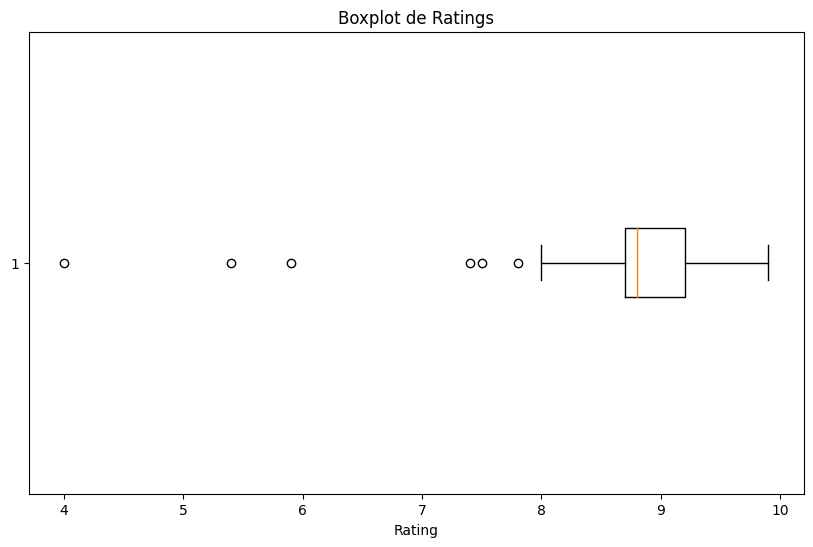

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(resultado['rating'].dropna(), vert=False)
plt.title('Boxplot de Ratings')
plt.xlabel('Rating')
plt.show()

In [ ]:

Q1 = resultado['rating'].quantile(0.25)
Q3 = resultado['rating'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = resultado[(resultado['rating'] < lower_bound) | (resultado['rating'] > upper_bound)]
rx = outliers[['ID', 'rating']]
print("Outliers:")
print(rx)


Outliers:
    ID  rating
8   68     7.5
28  69     7.8
58  70     7.4
70  71     5.4
61  72     5.9
16  73     4.0


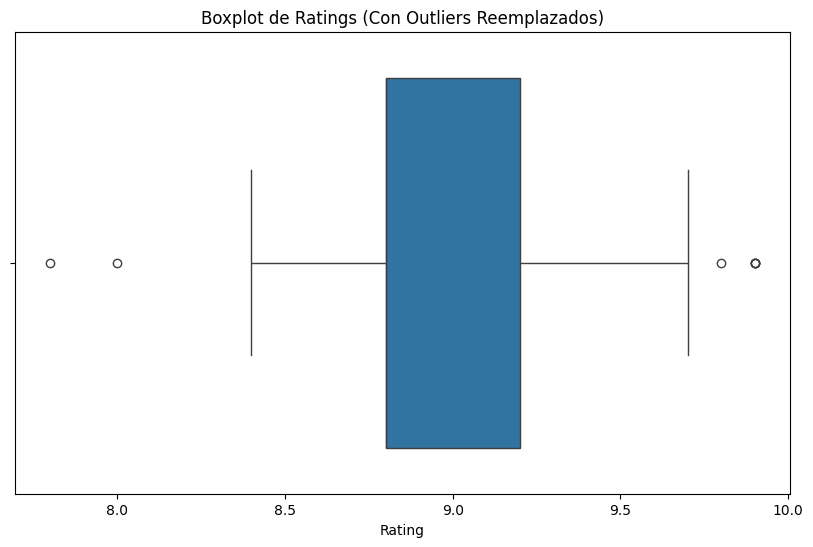

Media Original: 8.815068493150685
Varianza Original: 0.89574200913242
Media Ajustada: 9.004109589041095
Varianza Ajustada: 0.2056773211567731


In [ ]:

media_original = resultado['rating'].mean()
varianza_original = resultado['rating'].var()


Q1 = resultado['rating'].quantile(0.25)
Q3 = resultado['rating'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

median_rating = resultado['rating'].median()
resultado['rating'] = resultado['rating'].apply(lambda x: median_rating if x < lower_bound or x > upper_bound else x)

media_ajustada = resultado['rating'].mean()
varianza_ajustada = resultado['rating'].var()

plt.figure(figsize=(10, 6))
sns.boxplot(x=resultado['rating'])
plt.title('Boxplot de Ratings (Con Outliers Reemplazados)')
plt.xlabel('Rating')
plt.show()

print("Media Original:", media_original)
print("Varianza Original:", varianza_original)
print("Media Ajustada:", media_ajustada)
print("Varianza Ajustada:", varianza_ajustada)

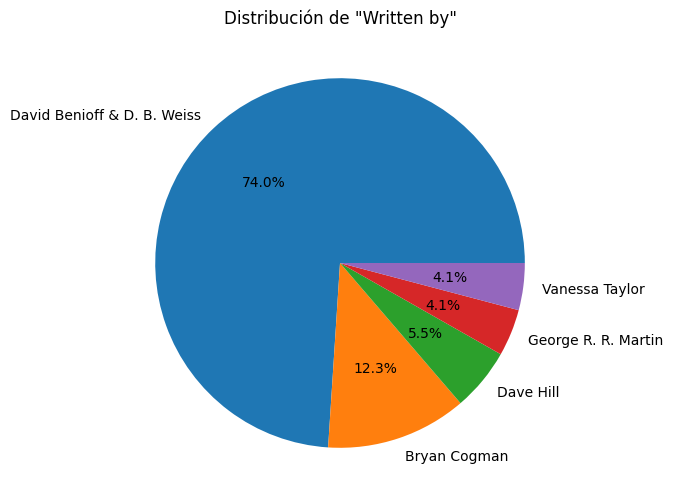

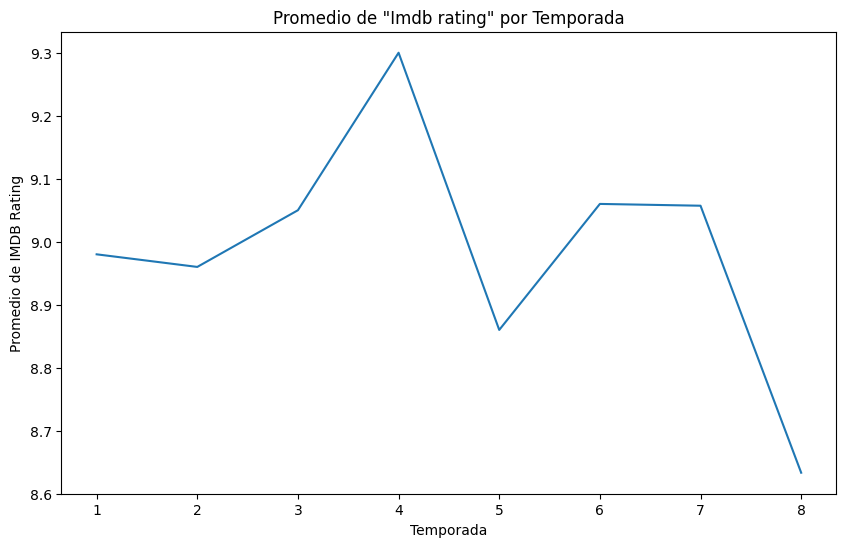

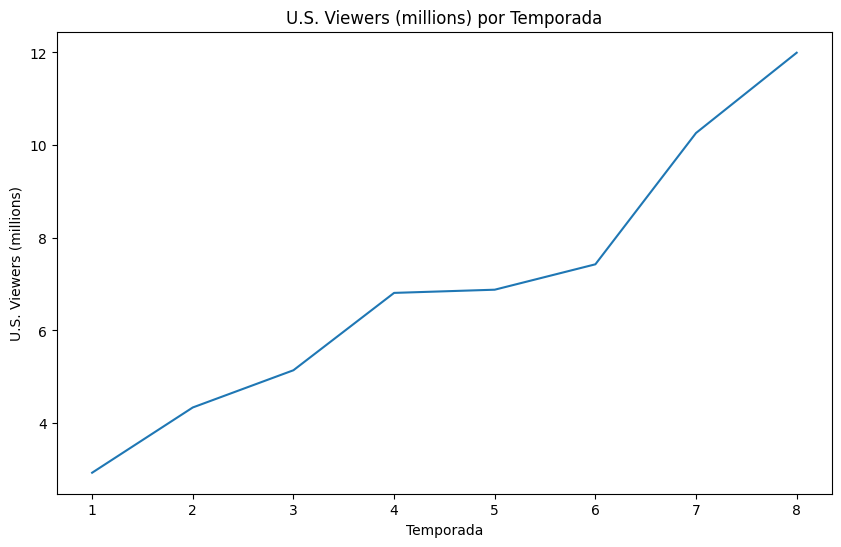

In [ ]:

# "Written by"
plt.figure(figsize=(8, 6))
resultado['Written by'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de "Written by"')
plt.ylabel('')
plt.show()

# Rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=resultado.groupby('Temporada')['rating'].mean().reset_index(), x='Temporada', y='rating')
plt.title('Promedio de "Imdb rating" por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de IMDB Rating')
plt.show()

# vistas
plt.figure(figsize=(10, 6))
sns.lineplot(data=resultado.groupby('Temporada')['espectadores'].mean().reset_index(), x='Temporada', y='espectadores')
plt.title('U.S. Viewers (millions) por Temporada')
plt.xlabel('Temporada')
plt.ylabel('U.S. Viewers (millions)')
plt.show()


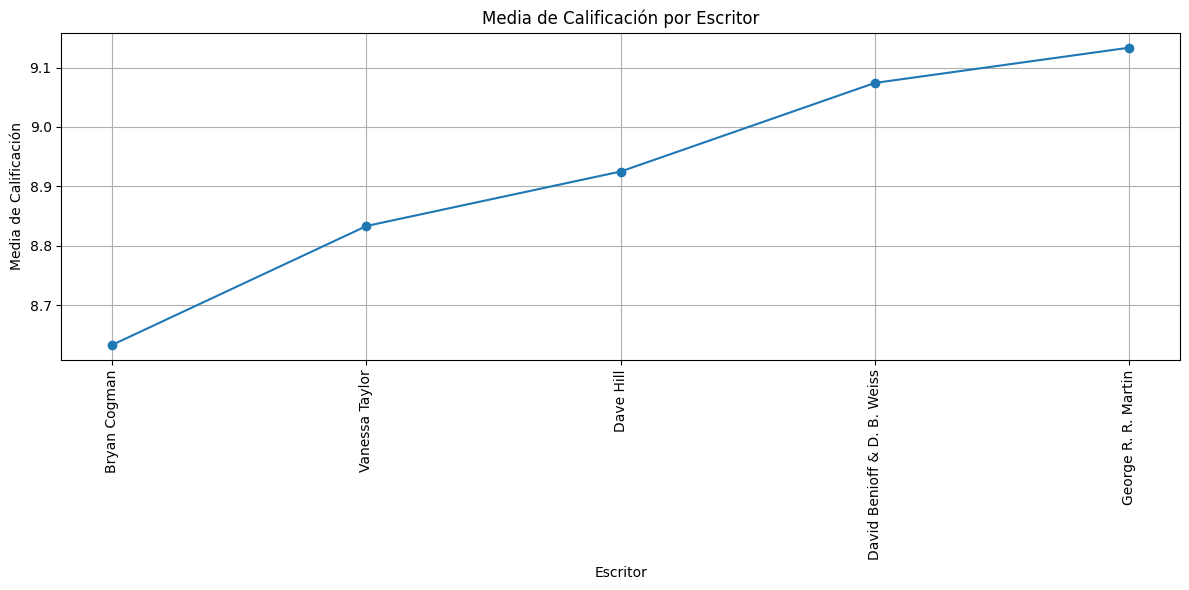

In [ ]:
media_rating_por_escritor = resultado.groupby('Written by')['rating'].mean()

media_rating_por_escritor = media_rating_por_escritor.sort_values()

plt.figure(figsize=(12, 6))
plt.plot(media_rating_por_escritor.index, media_rating_por_escritor.values, marker='o', linestyle='-')
plt.xlabel('Escritor')
plt.ylabel('Media de Calificación')
plt.title('Media de Calificación por Escritor')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()